## Homework 9: CART - Loan Status
Katie Corcoran

#### Question 1: EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
randomstate = 1000

df = pd.read_csv('lendingclub.csv')
df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [3]:
df.isna().sum()

home_ownership    0
income            0
dti               0
fico              0
loan_status       0
dtype: int64

No missing data!

In [4]:
df.describe()

,home_ownership,income,dti,fico,loan_status
count,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000
mean,0.573568,74.058571,18.907824,692.504405,0.649339
std,0.494667,39.335066,8.460242,28.854947,0.477282
min,0.000000,20.000000,0.740000,660.000000,0.000000
25%,0.000000,46.000000,12.617500,670.000000,0.000000
50%,1.000000,65.000000,18.420000,685.000000,1.000000
75%,1.000000,92.000000,25.287500,705.000000,1.000000
max,1.000000,250.000000,39.660000,845.000000,1.000000


All of our numerical data looks to be within a reasonable range.

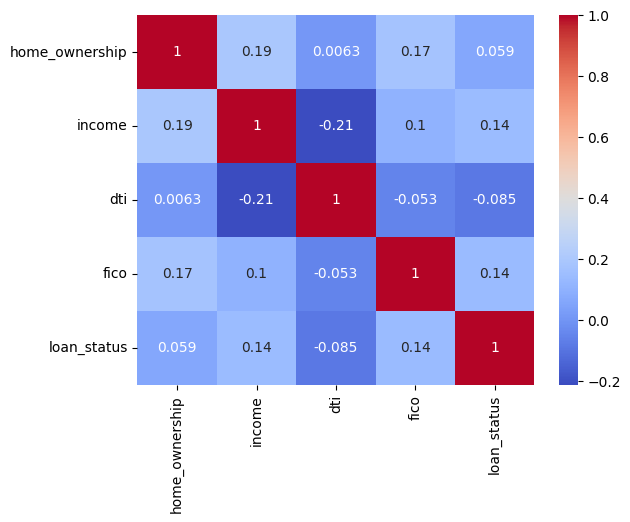

In [5]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

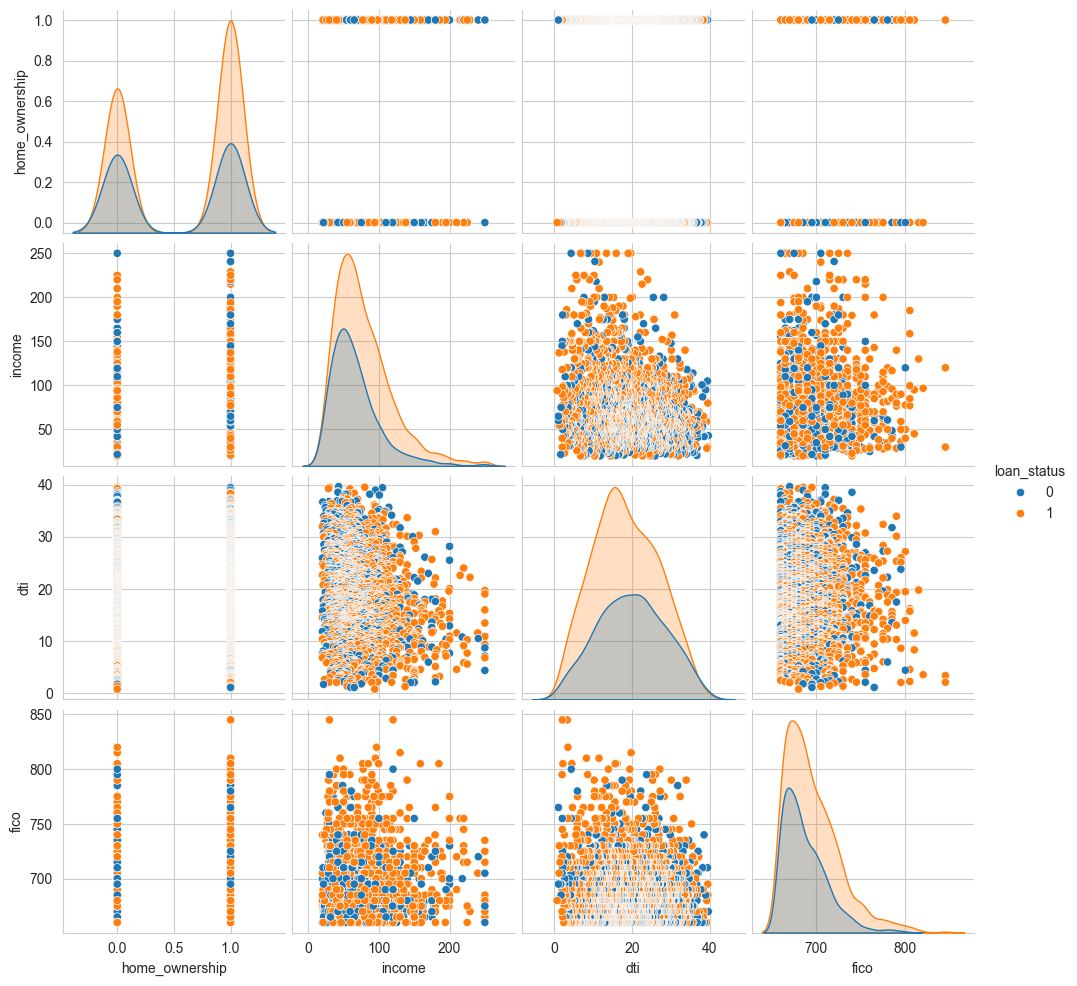

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'loan_status')
plt.show()

From the correlation matrix and pair plot, we can see that a higher income and fico score lead to a lower probability of default. A higher debt to income ratio is negatively correlated with the probability of the loan status being good, but only by a very small amount. In addition, more people who own homes have good condition loan stauses versus those who do not.

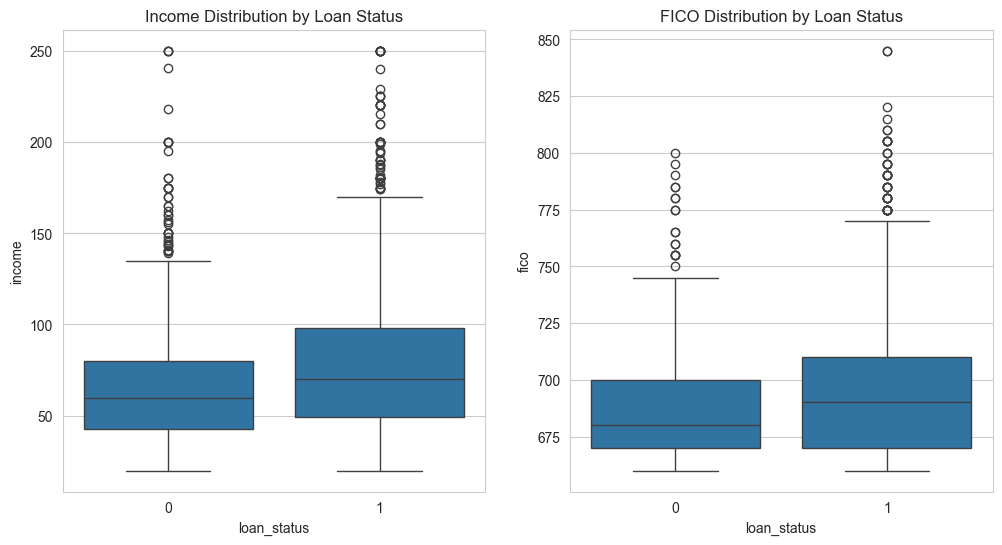

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='loan_status', y='income', data=df, ax=ax[0])
ax[0].set_title("Income Distribution by Loan Status")
sns.boxplot(x='loan_status', y='fico', data=df, ax=ax[1])
ax[1].set_title("FICO Distribution by Loan Status")
plt.show()

People with a good condition loan status tend to have a slightly higher income and fico score, although slightly more distributed than those with default loan statuses. This tells us that a low income or fico score may not mean that a person has a high probability of default, but it could be an indicator.

#### Question 2: CART Classification

#### 1. loan_status Distribution

In [8]:
pd.crosstab(df['loan_status'],df['loan_status'], normalize='all')*100

loan_status,0,1
loan_status,,
0,35.066079,0.000000
1,0.000000,64.933921


The data looks relatively balanced, so we can likely trust accuracy.


### 2. Train and test split

In [9]:
from sklearn.model_selection import train_test_split

target = df['loan_status']
X = df.drop(['loan_status'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=randomstate)
X_train.head()

,home_ownership,income,dti,fico
1377,1,108.000,15.96,685
1803,1,150.000,11.30,685
1431,1,54.000,15.38,665
1666,1,50.000,13.13,720
425,1,77.721,27.18,800


#### 3. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

Tree_Classifier = DecisionTreeClassifier()
Tree_Classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_hat = Tree_Classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.37      0.41      0.39       160
           1       0.66      0.62      0.64       294

    accuracy                           0.55       454
   macro avg       0.51      0.51      0.51       454
weighted avg       0.56      0.55      0.55       454



Accuracy=0.55: This model predicts loan status correctly 55% of the time, which isn't a great performance.\
Precision=0.66: Of all predicted good loan statuses, 66% were correct.\
Recall=0.62: Of all actual good loan statuses, this model predicted 62% of them.\
F1-Score=0.64: The harmonic mean between precision and recall.

Our accuracy is poor, and precision and recall are not great either. However, the model does look to be relatively balanced between precision and recall. I do trust the accuracy of the model because loan_status was relatively balanced between default and good condition.

#### 4. Pruning the tree

In [13]:
# Find the cost complexity pruning path
Tree_classifier = DecisionTreeClassifier()
path = Tree_classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([0.        , 0.0003304 , 0.00033651, 0.00033887, 0.00034263,
        0.00034263, 0.00034263, 0.00035042, 0.00035745, 0.00036711,
        0.00036711, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00036711, 0.00036711, 0.00036711, 0.00036711, 0.00036711,
        0.00037275, 0.00039333, 0.000413  , 0.000413  , 0.000413  ,
        0.000413  , 0.000413  , 0.000413  , 0.000413  , 0.000413  ,
        0.000413  , 0.000413  , 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00044053, 0.00044053, 0.00044053,
        0.00044053, 0.00044053, 0.00044053, 0.00044053, 0.00044201,
        0.00045054, 0.00045888, 0.00045888, 0.00045888, 0.00045888,
        0.00045888, 0.00045888, 0.00045888, 0.00045888, 0.00045888,
        0.00045888, 0.00047199, 0.00047199, 0.00047199, 0.00047199,
        0.00048183, 0.00048183, 0.00048183, 0.00048948, 0.00048948,
        0.00048948, 0.00048948, 0.00048948, 0.00049504, 0.00049559,
        0.00049559, 0.00049559, 0.

In [14]:
from sklearn.model_selection import cross_val_score

# Get the cross-validated accuracy for each ccp_alpha.
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    accuracy_cv.append(np.mean(accuracy))
 
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.554518
1,0.000330,0.554520
2,0.000337,0.547362
3,0.000339,0.550114
4,0.000343,0.557826


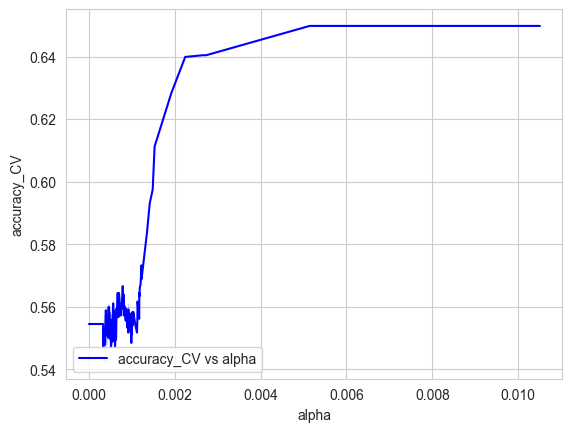

In [15]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

Accuracy is much higher beyond alpha=0.002, and looks to hit a max at around 0.005.

In [16]:
print(output.iloc[np.argmax(output['accuracy_CV']),])
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),]['alpha']

alpha          0.005143
accuracy_CV    0.649781
Name: 214, dtype: float64


#### 5. Refit with the optimal alpha

In [17]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_optimized = optimal_DT.predict(X_test)

#### 6. Report metrics

In [18]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.65      1.00      0.79       294

    accuracy                           0.65       454
   macro avg       0.32      0.50      0.39       454
weighted avg       0.42      0.65      0.51       454



Even though accuracy is higher, the recall is 1.0, which tells us the model is always predicting 1. This means our alpha is likely too high; we could try other values of alpha or changing the threshold to reduce false positives.

#### 7. Estimate test accuracy using cross validation

In [19]:
accuracy = cross_val_score(estimator=optimal_DT, X=X_train, y=y_train, cv=5, scoring="accuracy")
round(accuracy.mean(), 3)

0.65

#### 8. Classification tree visualization

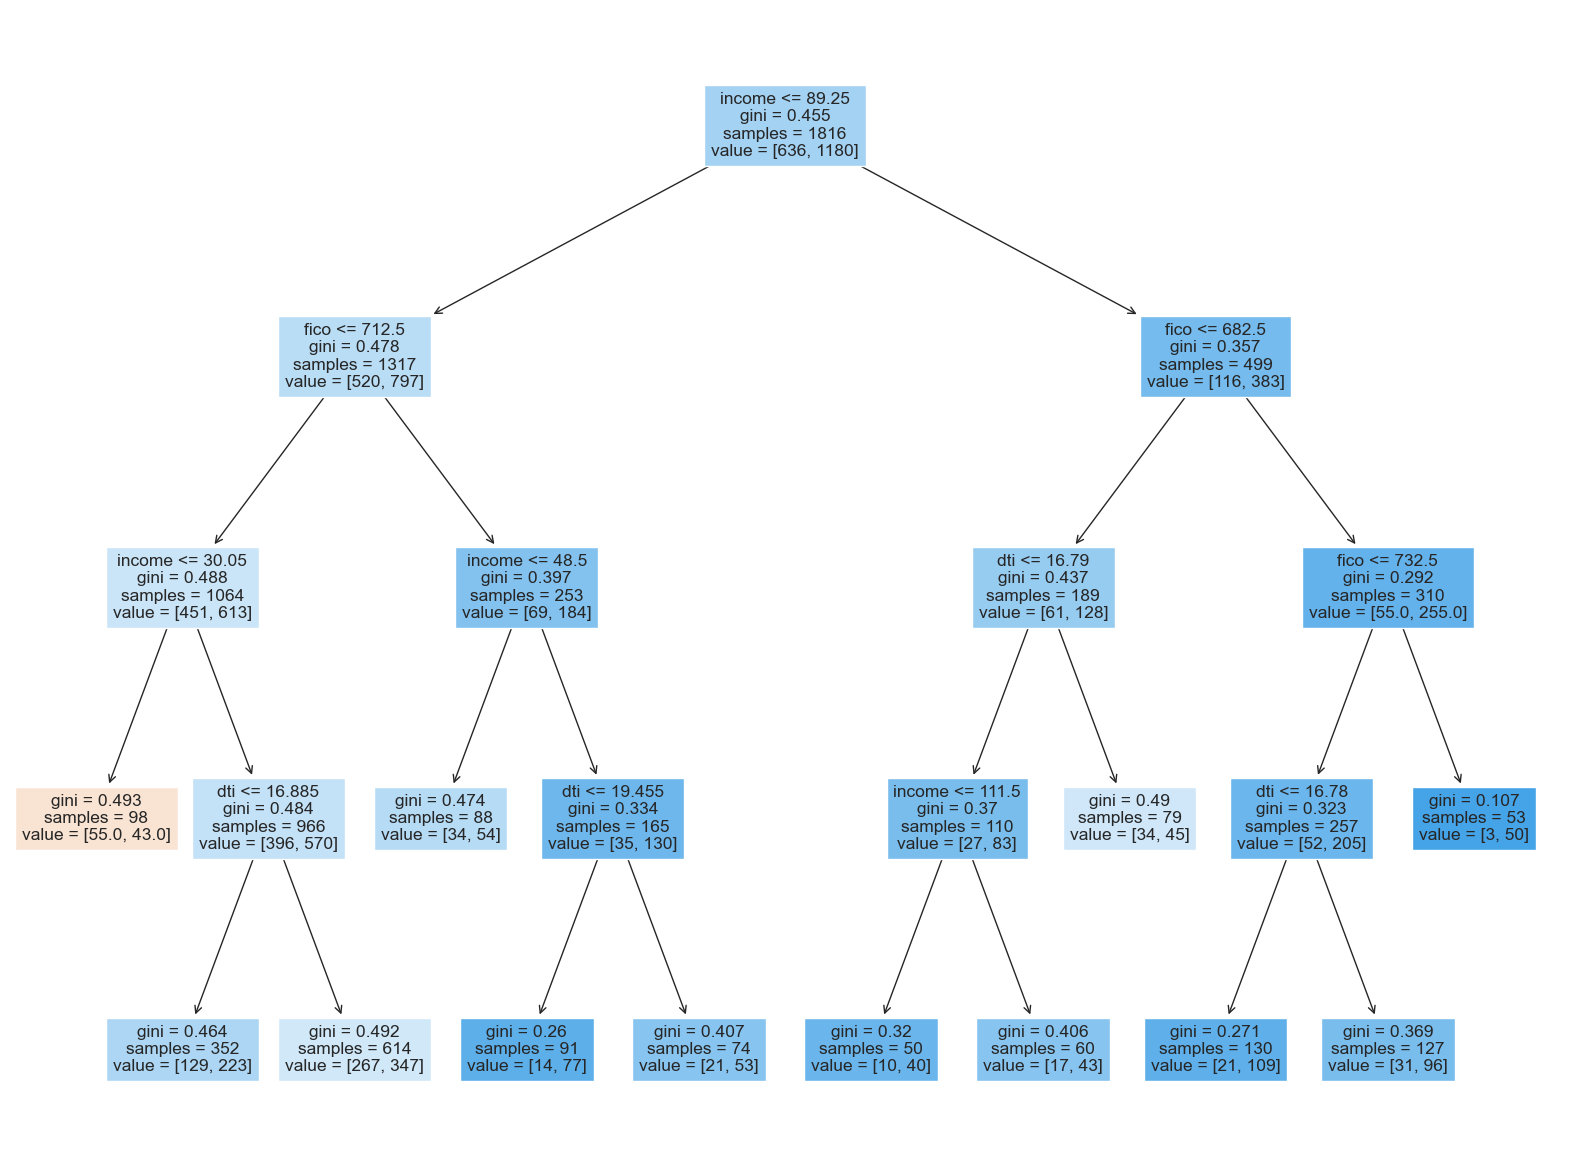

In [20]:
from sklearn.tree import plot_tree

dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)
fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)

1. The best feature to start with is Income, and the algorithm put the cut off point at <=89.25.
2. One of the paths down says that if income>89.5, fico score<=682.5, dti > 16.79, then good condition. All terminal nodes except 1 are predicting a good condition loan status.
3. There are 12 terminal nodes. The reason there are 12 instead of 16 is because we told the algorithm to have no fewer than 50 samples at each terminal node, which caused the algorithm to stop splitting some nodes before the maximum depth.
4. In general, there seem to be quite a few gini values greater than 0.40, some even equal to 0.49, which tells us this model is only doing slightly better than a random predictor. It is doing better, which is good, but I would hope to find a better model.